In [7]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [8]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [11]:
len(X_train)

60000

In [13]:
len(X_test)

10000

In [15]:
X_train[0].shape

(28, 28)

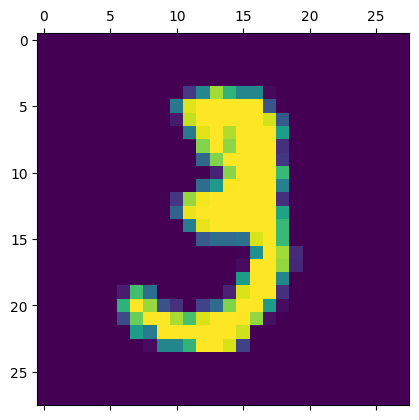

In [17]:
plt.matshow(X_train[10])

In [19]:
X_train = X_train / 255
X_test = X_test / 255

In [21]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [23]:
model = keras.Sequential([
    keras.Input(shape=(784,)),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 772us/step - accuracy: 0.8792 - loss: 0.4656
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 772us/step - accuracy: 0.9154 - loss: 0.3040
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 770us/step - accuracy: 0.9208 - loss: 0.2831
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 791us/step - accuracy: 0.9229 - loss: 0.2734
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 814us/step - accuracy: 0.9262 - loss: 0.2670


In [25]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - accuracy: 0.9240 - loss: 0.2683


[0.2682575285434723, 0.9240000247955322]

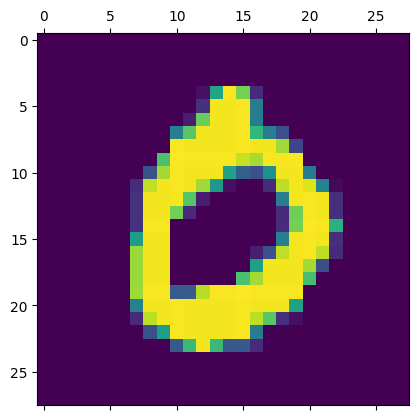

In [27]:
plt.matshow(X_test[3])

In [29]:
y_predicted = model.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step


In [31]:
np.argmax(y_predicted[3])

np.int64(0)

In [33]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:10]

[np.int64(7),
 np.int64(2),
 np.int64(1),
 np.int64(0),
 np.int64(4),
 np.int64(1),
 np.int64(4),
 np.int64(9),
 np.int64(6),
 np.int64(9)]

In [35]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [37]:
cm = tensorflow.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

Text(95.72222222222221, 0.5, 'Actual')

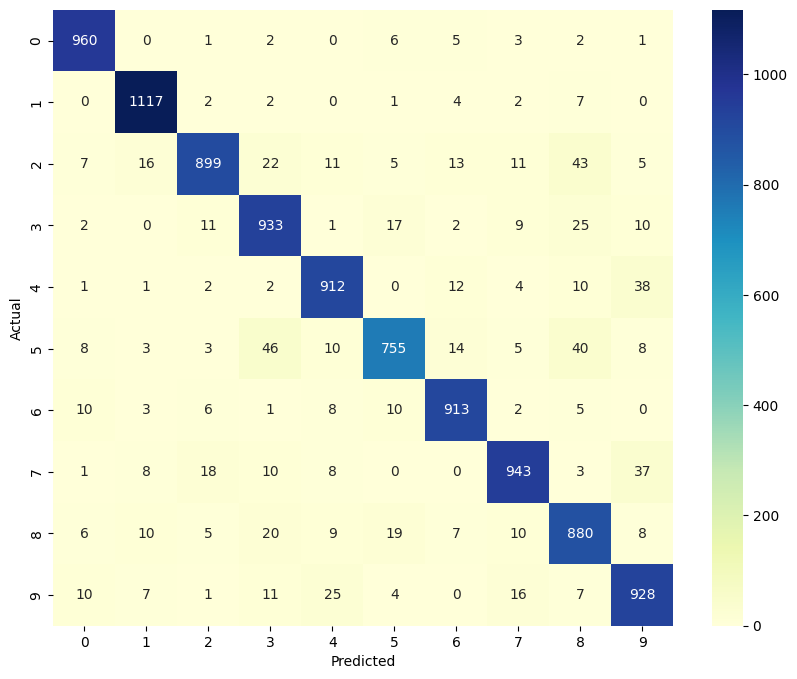

In [41]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [45]:
model = keras.Sequential([
    keras.Input(shape=(784,)),          # Use Input layer instead of input_shape
    keras.layers.Dense(784, activation='relu'),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')  # consider softmax for multi-class
])

model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9453 - loss: 0.1796
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9754 - loss: 0.0792
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9823 - loss: 0.0548
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9869 - loss: 0.0422
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9895 - loss: 0.0329


In [47]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9765 - loss: 0.0986


[0.09857408702373505, 0.9764999747276306]

In [49]:
y_predicted = model.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


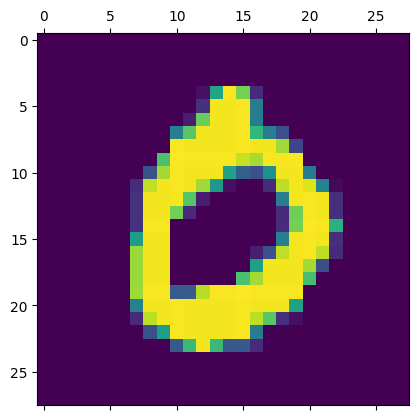

In [51]:
plt.matshow(X_test[3])

In [53]:
np.argmax(y_predicted[3])

np.int64(0)

In [55]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:10]

[np.int64(7),
 np.int64(2),
 np.int64(1),
 np.int64(0),
 np.int64(4),
 np.int64(1),
 np.int64(4),
 np.int64(9),
 np.int64(5),
 np.int64(9)]

In [57]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [59]:
cm = tensorflow.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

Text(95.72222222222221, 0.5, 'Actual')

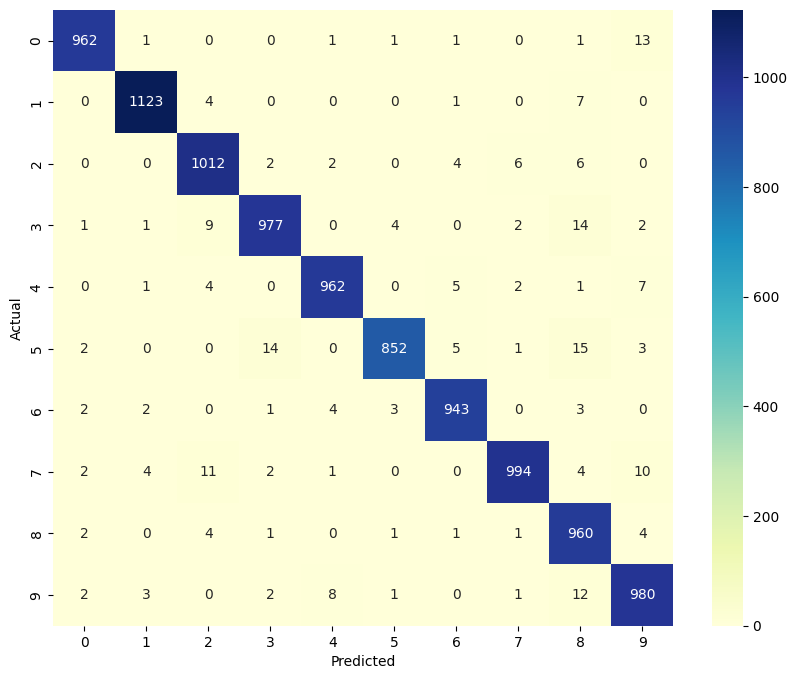

In [61]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel("Predicted")
plt.ylabel("Actual")